In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston() 
features = pd.DataFrame(boston.data,columns=boston.feature_names) 
targets = boston.target 

**Dataset Columns information:**

* **crim**
per capita crime rate by town.

* **zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

* **indus**
proportion of non-retail business acres per town.

* **chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* **nox**
nitrogen oxides concentration (parts per 10 million).

* **rm**
average number of rooms per dwelling.

* **age**
proportion of owner-occupied units built prior to 1940.

* **dis**
weighted mean of distances to five Boston employment centres.

* **rad**
index of accessibility to radial highways.

* **tax**
full-value property-tax rate per \$10,000.

* **ptratio**
pupil-teacher ratio by town.

* **black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* **lstat**
lower status of the population (percent).

* **target: medv**
median value of owner-occupied homes in \$1000s.

In [4]:
dataset = features.copy()
dataset['target'] = targets.copy()
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


looking at the quartiles, mean & sd. we can observe that some of the columns have outliers. Specifically CRIM and ZN. Another observation can be made that CHAS is a binary feature (ie categorical)

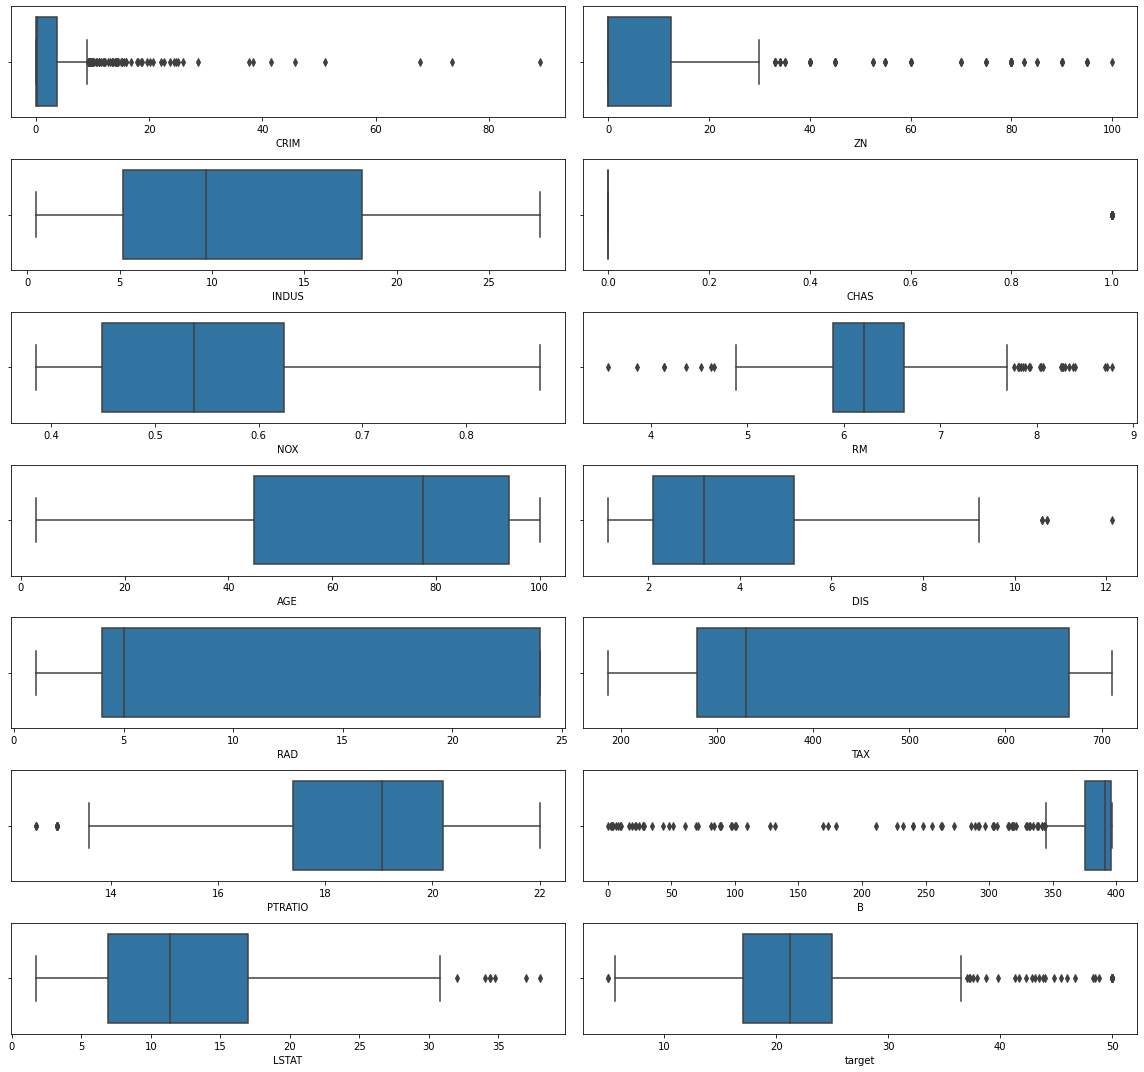

In [43]:
fig,ax = plt.subplots(nrows = 7, ncols = 2, figsize=(16,15))
ax = ax.flatten()
for ix,i in enumerate(dataset.columns):
  sns.boxplot(data = dataset, x = i, ax=ax[ix])
plt.tight_layout()

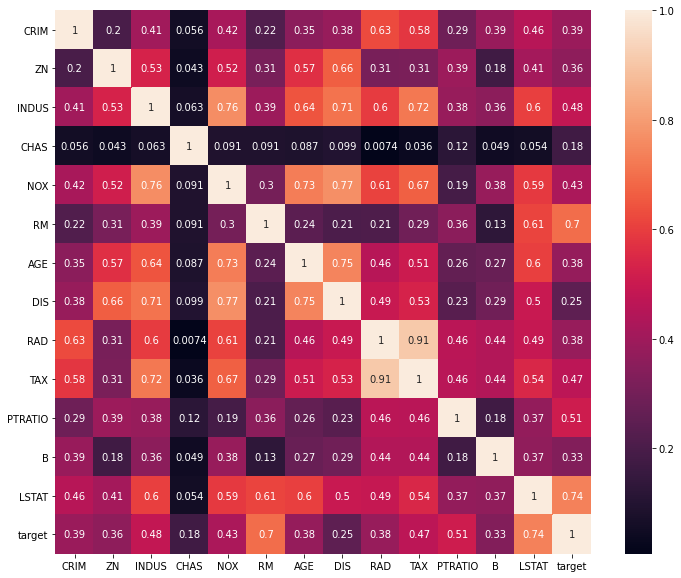

In [8]:
corr = dataset.corr().abs()
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr,ax = ax, annot = True)

In [36]:
X = features[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,targets)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [39]:
def performance(x,y, model, name:str = "model"):
  y_pred = model.predict(x)
  mse = mean_squared_error( y, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y,y_pred)

  print(f"Test Performance of {name}: \nrmse : {rmse} \nR2 : {r2}")

def get_steps(model, poly = 2):
  seq = [('scale', StandardScaler())]
  if poly > 0:
    seq.append(('fearurize', PolynomialFeatures(degree=poly)))
  
  seq.append(('model', model))
  return seq

In [40]:
seq = get_steps(Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
lasso_pipe = Pipeline(seq)
lasso_pipe.fit(X_train, y_train)
performance(X_test,y_test,lasso_pipe, "lasso")

Test Performance of lasso: 
rmse : 3.6361107455341823 
R2 : 0.860645152934197


In [41]:
seq = get_steps(Ridge(alpha=0.012, fit_intercept=True, max_iter=3000))
ridge_pipe = Pipeline(seq)
ridge_pipe.fit(X_train, y_train)
performance(X_test,y_test,ridge_pipe,"ridge")

Test Performance of ridge: 
rmse : 4.270755483160268 
R2 : 0.8077540103019512


In [42]:
seq = get_steps(RandomForestRegressor(n_estimators=300))
rf_pipe = Pipeline(seq)
rf_pipe.fit(X_train, y_train)
performance(X_test,y_test,rf_pipe, "random forest")

Test Performance of random forest: 
rmse : 3.3033024457531837 
R2 : 0.8849876300590962
